
<span style="font-family: Arial; font-size:2em;color:gold;"> </p> Prédiction des Zones dangereuses sur les routes


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import folium
import mpl_toolkits
from folium import plugins
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Decouvrir la Data**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('RedLightCameraViolations.csv')
df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121.0,3100 S DR MARTIN L KING,2014-08-02T00:00:00,16,NaN,NaN,NaN,NaN,NaN
1,MADISON AND CENTRAL,1751.0,0 S CENTRAL AVENUE,2014-07-15T00:00:00,5,NaN,NaN,NaN,NaN,NaN
2,HOMAN/KIMBALL AND NORTH,1771.0,1600 N HOMAN AVENUE,2014-07-27T00:00:00,1,NaN,NaN,NaN,NaN,NaN
3,IRVING PARK AND LARAMIE,1533.0,5200 W IRVING PARK ROA,2014-08-07T00:00:00,6,NaN,NaN,NaN,NaN,NaN
4,ASHLAND AND MADISON,1911.0,0 N ASHLAND AVE,2014-07-23T00:00:00,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
423255,DIVERSEY AND AUSTIN,1453.0,6000 W DIVERSEY AVENUE,2018-11-05T00:00:00,1,1.135896e+06,1.918030e+06,41.931249,-87.776029,"{'needs_recoding': False, 'longitude': '-87.77..."
423256,PULASKI AND 63RD,2343.0,4000 W 63RD ST,2018-11-05T00:00:00,2,1.150768e+06,1.862565e+06,41.778767,-87.722823,"{'needs_recoding': False, 'longitude': '-87.72..."
423257,WESTERN AND MARQUETTE,2672.0,6700 S WESTERN AVENUE,2018-11-05T00:00:00,8,1.161489e+06,1.860135e+06,41.771884,-87.683588,"{'needs_recoding': False, 'longitude': '-87.68..."
423258,IRVING PARK AND KILPATRICK,2764.0,4700 W IRVING PARK ROA,2018-11-05T00:00:00,6,NaN,NaN,NaN,NaN,NaN
423259,DAMEN AND 63RD,2702.0,6300 S DAMEN AVENUE,2018-11-05T00:00:00,4,1.164069e+06,1.862830e+06,41.779227,-87.674053,"{'needs_recoding': False, 'longitude': '-87.67..."


In [5]:
df.describe()

,CAMERA ID,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,422708.000000,423260.000000,3.983650e+05,3.983650e+05,398365.000000,398365.000000
mean,1864.380783,5.675074,1.157426e+06,1.898868e+06,41.878245,-87.697463
std,503.332165,7.234203,1.412095e+04,3.075603e+04,0.084542,0.051428
min,1002.000000,1.000000,1.125717e+06,1.825911e+06,41.677721,-87.812781
25%,1444.000000,2.000000,1.147196e+06,1.871162e+06,41.802366,-87.735109
50%,1853.000000,4.000000,1.157213e+06,1.907723e+06,41.902714,-87.697679
75%,2294.000000,7.000000,1.167172e+06,1.921821e+06,41.940909,-87.662293
max,8313.000000,186.000000,1.191188e+06,1.947754e+06,42.012371,-87.575293


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423260 entries, 0 to 423259
Data columns (total 10 columns):
INTERSECTION      423260 non-null object
CAMERA ID         422708 non-null float64
ADDRESS           423260 non-null object
VIOLATION DATE    423260 non-null object
VIOLATIONS        423260 non-null int64
X COORDINATE      398365 non-null float64
Y COORDINATE      398365 non-null float64
LATITUDE          398365 non-null float64
LONGITUDE         398365 non-null float64
LOCATION          398365 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 32.3+ MB


In [7]:
print(df.shape)
print(df.columns)

(423260, 10)
Index(['INTERSECTION', 'CAMERA ID', 'ADDRESS', 'VIOLATION DATE', 'VIOLATIONS',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


In [8]:
df['INTERSECTION'].value_counts()

CALIFORNIA AND DIVERSEY          4593
KOSTNER AND NORTH                4073
BELMONT AND KEDZIE               3899
STONEY ISLAND AND 79TH           3367
ROOSEVELT AND HALSTED            3161
VAN BUREN AND WESTERN            3155
LAKE SHORE DR AND BELMONT        3149
ASHLAND AND FULLERTON            3148
HOLLYWOOD AND SHERIDAN           3131
WENTWORTH AND GARFIELD           3128
STATE AND 79TH                   3128
LAFAYETTE AND 87TH               3111
DIVISION AND DAMEN               3100
CORTLAND AND ASHLAND             3094
ARCHER AND CICERO                3091
OGDEN AND KOSTNER                3089
99TH AND HALSTED                 3088
75TH AND STATE                   3085
STONEY ISLAND AND 76TH           3080
55TH AND WESTERN                 3080
STONY ISLAND/CORNELL AND 67TH    3076
63RD AND STATE                   3066
PETERSON AND WESTERN             3064
HALSTED AND DIVISION             3063
87TH AND VINCENNES               3057
CHICAGO AND CLARK                3055
COLUMBUS AND

In [9]:
print('Total violations length:\n{}\n'.format(len(df.index)))

Total violations length:
423260



**Nettoyer la Data**

In [10]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
   

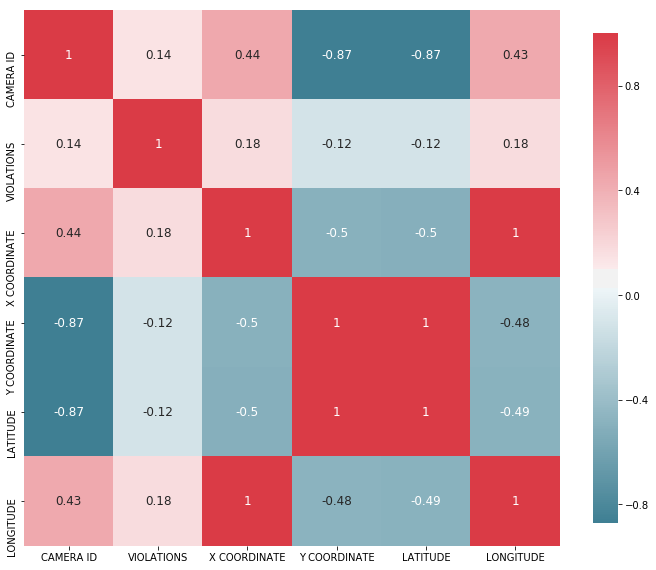

In [11]:
plot_correlation_map( df )

In [12]:
df=df.drop(columns=['X COORDINATE', 'Y COORDINATE'])
df=df.dropna(how='any')

**Visualisation de La Data**

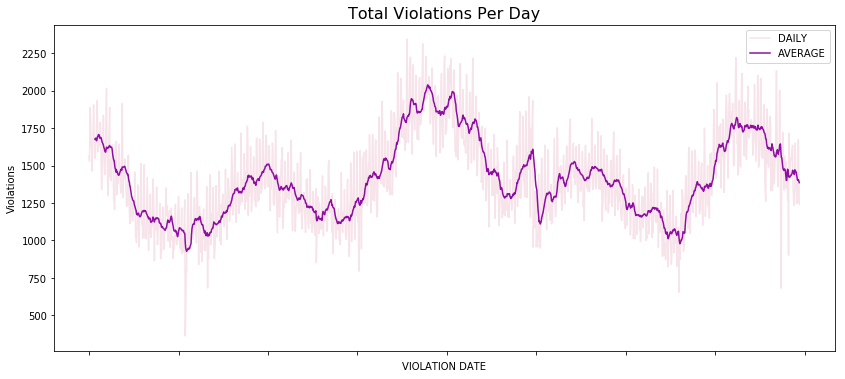

In [13]:
plt.figure(figsize=(14,6))
cmap = plt.cm.plasma
df.groupby('VIOLATION DATE')['VIOLATIONS'].sum().plot(alpha=0.15, color=cmap(0.5))
df.groupby('VIOLATION DATE')['VIOLATIONS'].sum().rolling(window=14).mean().plot(color=cmap(0.3))
plt.ylabel('Violations')
plt.title('Total Violations Per Day', fontsize=16)
plt.legend(['DAILY','AVERAGE'])
plt.show()

*On peut remarquer ici qu'il ya une tendance saisonniere avec les violations des feux rouges qui montre que les milieux des mois presente une augmentation de ces violatios comparé au reste du mois.*

** Voir la Data a travers les Cartes afin de la Comprendre plus **

In [ ]:
def process_dataframes(df):
    df = df.dropna()
   
    agg_violations = pd.DataFrame(df.groupby(['ADDRESS', 'LATITUDE', 'LONGITUDE'])['VIOLATIONS'].sum()).reset_index()
    return agg_violations

def add_markers_folium_map(df, m, color):
  
    for i in range(0,len(df)):
        folium.Circle(
        location=[df['LATITUDE'][i], df['LONGITUDE'][i]],
        popup='ADDRESS: ' + df['ADDRESS'][i] + ', #VIOLATIONS = %i' %df['VIOLATIONS'][i],
        radius=float(df['VIOLATIONS'][i])*0.007,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)
    return m

In [ ]:
m = folium.Map([41.677721,-87.812781 ], zoom_start=11)
m


Cette Carte represente la zone geometrique de la Data 

In [16]:
viol_red_light = process_dataframes(df)
red_cam_maps = folium.Map(location=[41.878, -87.62], height = 700, tiles='CartoDB dark_matter', zoom_start=12)
for i in range(0,len(viol_red_light)):
    folium.CircleMarker([viol_red_light.iloc[i]['LATITUDE'], viol_red_light.iloc[i]['LONGITUDE']], radius=5, color='red', fill=True).add_to(red_cam_maps)
red_cam_maps


cette carte nous fait voir les intersections qu'on a pu localiser et on peut tres bien remarquer que cela s'etend sur tout Chicago

In [17]:
maps = folium.Map(location=[41.878, -87.62], height = 700, tiles='Stamen Terrain', zoom_start=12)
for i in range(0,len(viol_red_light)):
    folium.Marker([viol_red_light.iloc[i]['LATITUDE'], viol_red_light.iloc[i]['LONGITUDE']], popup=viol_red_light.iloc[i]['ADDRESS']).add_to(maps)
maps

cette carte nous montre la Localisation des cameras dans tout Chicago on peut remarquer qu'ils sont assez nombreuses et assez etendus sur Chicago.

In [18]:
heat_viol = viol_red_light[['LATITUDE', 'LONGITUDE']].values
m2 = folium.Map(location=[np.mean(viol_red_light['LATITUDE']), np.mean(viol_red_light['LONGITUDE'])])
m2.add_child(plugins.HeatMap(heat_viol, radius=25))

Cette Carte est l'une des plus importantes elle nous donne une image globale de la Data ainsi on Peut voir que la zone rouge qui est la zone la plus violente et ou se concentre les violations des feux rouges s'etend principalement de Lincolnwood à dolton et qui ne touche pas la partie ouest de chicago.

In [19]:
viol_red_light = process_dataframes(df)
m = folium.Map(location=[np.mean(viol_red_light['LATITUDE']), np.mean(viol_red_light['LONGITUDE'])])
m = add_markers_folium_map(viol_red_light, m, 'red')

In [20]:
m

On va aller un peu plus en detaille en voyant ces violations a travers des marqueurs comme ca on peut voir les points les plus denses .

In [21]:
import re
def subber(inp):
    ret = re.sub('[\/]+', '-', inp)
    return re.sub('[^0-9a-zA-Z\-]+', ' ',ret).strip()
df['VIOLATION DATE'] = df['INTERSECTION'].apply(subber).str.upper()
intersections = df['INTERSECTION'].str.split('-')
intersections[:5]

1909              [PULASKI AND FOSTER]
1910               [PULASKI AND NORTH]
1911    [IRVING PARK AND NARRAGANSETT]
1912              [ASHLAND AND ARCHER]
1913             [CICERO AND PETERSON]
Name: INTERSECTION, dtype: object

In [22]:
street_list = []

for inter in intersections:
    for street in inter:
        street_list.append(street)
        
street_list = pd.Series(street_list)

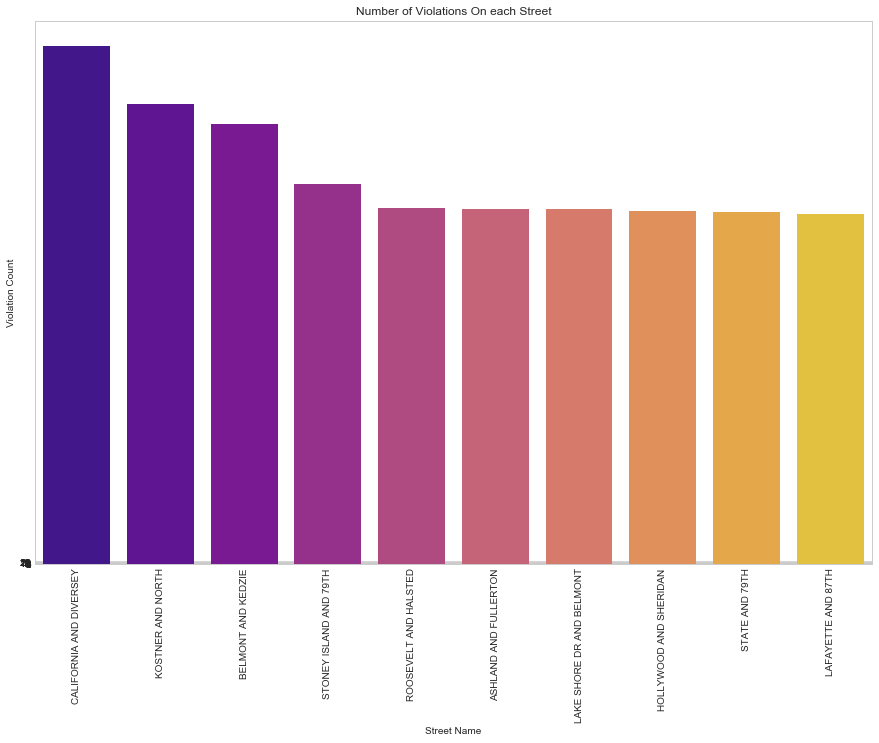

In [23]:
sns.set_style('whitegrid')
sort = pd.DataFrame(street_list.value_counts(),columns=['VIOLATIONS']).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x = sort.index, y='VIOLATIONS', data=sort, estimator=sum, palette='plasma')
plt.title('Number of Violations On each Street')
plt.xlabel('Street Name')
plt.ylabel('Violation Count')
plt.xticks(rotation='vertical')
plt.yticks(range(0,25,2))
plt.show()

apres avoir vu l'ensemble des violations a travers les cartes on va decortiquer un petit peu plus la data en voyant les 5 premieres intersections ou on a le plus de violations des feux rouges .on remarque ainsi que CALIFORNIA AND DIVERSEY est au Top suivie de KOSTNER AND NORTH .

In [24]:
df['VIOLATIONS_VALUE'] = np.where(df['VIOLATIONS']>=10, '1', '0')

In [25]:
def suff_remove(s):
    suff_list = [' STREET', ' ST', ' ROAD', ' RD', ' DRIVE', ' DR', ' CIRCLE', ' CR', ' HIGHWAY',' HWY']
    for suff in suff_list:
        s = s.replace(suff, '')
    return s
df['INTERSECTION'] = df['INTERSECTION'].apply(suff_remove)

In [26]:
from sklearn import preprocessing

def preprocess_data(df):
    le = preprocessing.LabelEncoder()
    df['ADDRESS'] = le.fit_transform(df.ADDRESS)
    df['INTERSECTION'] = le.fit_transform(df.INTERSECTION)
    return df

df = preprocess_data(df)

In [27]:
df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,LATITUDE,LONGITUDE,LOCATION,VIOLATIONS_VALUE
1909,143,1102.0,196,PULASKI AND FOSTER,5,41.975621,-87.728383,"{'needs_recoding': False, 'longitude': '-87.72...",0
1910,148,1994.0,156,PULASKI AND NORTH,7,41.909996,-87.726395,"{'needs_recoding': False, 'longitude': '-87.72...",0
1911,102,1024.0,247,IRVING PARK AND NARRAGANSETT,4,41.953025,-87.786683,"{'needs_recoding': False, 'longitude': '-87.78...",0
1912,26,2302.0,100,ASHLAND AND ARCHER,2,41.837733,-87.665894,"{'needs_recoding': False, 'longitude': '-87.66...",0
1913,61,1204.0,185,CICERO AND PETERSON,1,41.990008,-87.748377,"{'needs_recoding': False, 'longitude': '-87.74...",0


In [28]:
df['INTERSECTION'].max()

179

In [29]:
df['ADDRESS'].max()

296

In [30]:
y=df[['VIOLATIONS_VALUE']]
X=df[['ADDRESS','CAMERA ID','INTERSECTION','LONGITUDE','LATITUDE']]
np.any(np.isnan(X))

False

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.863


In [34]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X_train, y_train)
results = dt_clf.predict(X_test)
print(metrics.accuracy_score(y_test, results))

0.9096256079629002


In [35]:
from sklearn.cross_validation import ShuffleSplit
shuffle_validator = ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)

In [36]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(dt_clf, X, y, cv=shuffle_validator)
print(scores)
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

[0.90962561 0.91022886 0.9106813  0.91016602 0.91017859 0.90848195
 0.91161131 0.91074413 0.90815519 0.90973872 0.9094748  0.90918574
 0.90996494 0.90895952 0.90919831 0.90828086 0.90897209 0.91103319
 0.91034197 0.91065616]
Accuracy: 0.9098 (+/- 0.00)


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators,}


In [38]:
param_grid = {
    
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [39]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 13.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 13.7min finished


{'n_estimators': 300}

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_clf, X, y, cv=shuffle_validator, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.9123 (+/- 0.00)


In [41]:
gb_clf = GradientBoostingClassifier(n_estimators=100)
scores = cross_val_score(gb_clf, X, y, cv=shuffle_validator, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.9049 (+/- 0.00)


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier([('dt',dt_clf), ('gb', gb_clf)])
scores = cross_val_score(voting_clf, X, y, cv=shuffle_validator, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))
